In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import nltk
from sklearn import feature_extraction
import mpld3
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import ssl
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.externals import joblib
from time import time
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from pylab import *
import pylab as pl
from sklearn import cluster
import matplotlib.pyplot as plt
from stemming.porter2 import stem
from gensim.utils import lemmatize, simple_preprocess
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from operator import itemgetter


import xml.etree.ElementTree as ET



from time import time

%matplotlib inline

sns.set()

In [29]:
f = open('data.sgm', 'r')
data= f.read()
soup = BeautifulSoup(data)
parent_node = soup.findAll('reuters')

In [30]:
interesting = ['date', 'topics', 'places','people','orgs','exchanges','companies','title','dateline']

matrix = []
for data in parent_node:
    
    # Checking if data has body
    tmp = data.findChildren('body')
    if len(tmp) == 0:
        continue
   
    # Let's start to build the row, initially putting body in the first place
    row = [tmp[0].getText()]
    
    # For each interesting html tag
    for thing in interesting:
        tmp = data.findChildren(thing)
        
        # If it exists append to row otherwise append NaN to the row in the same position
        if len(tmp) == 0:
            row.append(None)
        else:
            text = tmp[0].getText()
            if len(text) > 0:
                row.append(text)
            else:
                row.append(None)
      
    matrix.append(row)
    
matrix = np.array(matrix)

In [31]:
mydict = {thing:matrix[:,idx+1] for idx, thing in enumerate(interesting)}
mydict['body'] = matrix[:,0]

df = pd.DataFrame(mydict)

In [32]:
f = open('01_reuters/all-places-strings.lc.txt','r')
places = [s.strip() for s in f.readlines()]
sorted_list = sorted(places, key=len, reverse=True)

In [33]:
def checkValues(value):
    original_value = value
    result = []
    for p in sorted_list:
        if p in value:
            result.append(p)
            value = value.replace(p,'')
            
    if len(value) > 0:
        print("weird",original_value)
            
    return result
        
df['places'] = df[df.places.notna()]['places'].apply(checkValues)

In [34]:
f = open('01_reuters/all-people-strings.lc.txt','r')
people = [s.strip() for s in f.readlines()]
sorted_list = sorted(people, key=len, reverse=True)

In [35]:
sorted_list = sorted(people, key=len, reverse=True)

In [36]:
f = open('01_reuters/all-topics-strings.lc.txt','r')
topics = [s.strip() for s in f.readlines()]
sorted_list = sorted(topics, key=len, reverse=True)

In [37]:
df['topics'] = df[df.topics.notna()]['topics'].apply(checkValues)

In [38]:
f = open('01_reuters/all-orgs-strings.lc.txt','r')
orgs = [s.strip() for s in f.readlines()]
sorted_list = sorted(orgs, key=len, reverse=True)

In [39]:
df['orgs'] = df[df.orgs.notna()]['orgs'].apply(checkValues)

In [40]:
f = open('01_reuters/all-exchanges-strings.lc.txt','r')
exchanges = [s.strip() for s in f.readlines()]
sorted_list = sorted(exchanges, key=len, reverse=True)

In [41]:
df['exchanges'] = df[df.exchanges.notna()]['exchanges'].apply(checkValues)

In [42]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ufuk.dogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = stopwords.words('english')
stop_words.append('said')
stop_words.append('reuters')
stop_words.append('reuter')

In [44]:
def clean_text(body_text):
    
    content = body_text.lower()
    content = content.replace('\n','')
    content = re.sub(r"[^a-zA-Z\s\\]","",content)
    tokenized_words = content.split()
    content_list = [word for word in tokenized_words if word not in stop_words]
    content2 = " ".join(content_list)
    clean_text = re.sub(r"\s+"," ",content2)
    return clean_text
    

df['body'] = df['body'].apply(clean_text)


In [45]:
filtered_dataframe = df[df.topics.notnull()]
filtered_dataframe

,date,topics,places,people,orgs,exchanges,companies,title,dateline,body
0,26-FEB-1987 15:01:01.79,[cocoa],"[el-salvador, uruguay, usa]",None,NaN,NaN,None,BAHIA COCOA REVIEW,"SALVADOR, Feb 26 -",showers continued throughout week inthe bahia ...
4,26-FEB-1987 15:10:44.60,"[sorghum, barley, grain, wheat, corn, oat]",[usa],None,NaN,NaN,None,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,"WASHINGTON, Feb 26 -",us agriculture departmentreported farmerowned ...
5,26-FEB-1987 15:14:36.41,"[lin-oil, linseed, oilseed, sorghum, soy-oil, ...",[argentina],None,NaN,NaN,None,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,"BUENOS AIRES, Feb 26 -",argentine grain board figures showcrop registr...
8,26-FEB-1987 15:17:11.20,[earn],[usa],None,NaN,NaN,None,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,"ROCHESTER, N.Y., Feb 26 -",champion products inc itsboard directors appro...
9,26-FEB-1987 15:18:06.67,[acq],[usa],None,NaN,NaN,None,COMPUTER TERMINAL SYSTEMS <CPML> COMPLETES SALE,"COMMACK, N.Y., Feb 26 -",computer terminal systems inc saidit completed...
10,26-FEB-1987 15:18:59.34,[earn],[usa],None,NaN,NaN,None,COBANCO INC <CBCO> YEAR NET,"SANTA CRUZ, Calif., Feb 26 -\n",shr cts vs dlrs net vs assets mln vs mln depos...
11,26-FEB-1987 15:19:15.45,"[earn, acq]",[usa],None,NaN,NaN,None,OHIO MATTRESS <OMT> MAY HAVE LOWER 1ST QTR NET,"CLEVELAND, Feb 26 -",ohio mattress co firstquarter ending february ...
12,26-FEB-1987 15:20:13.09,[earn],[usa],None,NaN,NaN,None,AM INTERNATIONAL INC <AM> 2ND QTR JAN 31,"CHICAGO, Feb 26 -\n",oper shr loss two cts vs profit seven cts oper...
13,26-FEB-1987 15:20:27.17,[earn],[usa],None,NaN,NaN,None,BROWN-FORMAN INC <BFD> 4TH QTR NET,"LOUISVILLE, Ky., Feb 26 -\n",shr one dlr vs cts net mln vs mln revs mln vs ...
17,26-FEB-1987 15:26:26.78,[earn],[usa],None,NaN,NaN,None,DEAN FOODS <DF> SEES STRONG 4TH QTR EARNINGS,"CHICAGO, Feb 26 -",dean foods co expects earnings thefourth quart...


Text(0.5, 1.0, 'Top10 Document Topic')

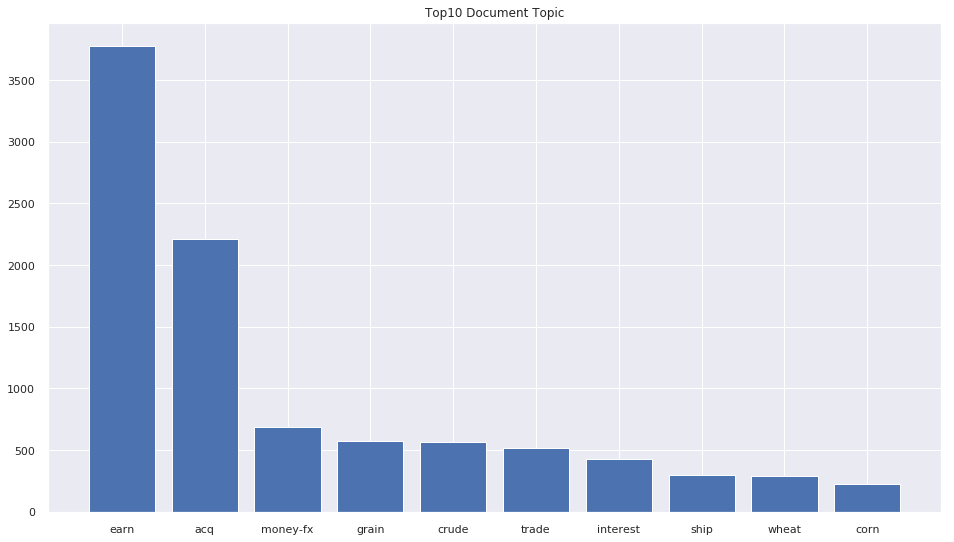

In [46]:
flat_topic_list = [item for sublist in filtered_dataframe['topics'] for item in sublist]
topics_counter = Counter(flat_topic_list)
sorted_topics_counter = topics_counter.most_common()

plot_dictionary = {}
for i in range(10):
    plot_dictionary[sorted_topics_counter[i][0]] = sorted_topics_counter[i][1]
x = plot_dictionary.keys()
y = plot_dictionary.values()
    
plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.title('Top10 Document Topic')


In [47]:
filtered_dataframe['topics_str'] = filtered_dataframe.topics.apply(str) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


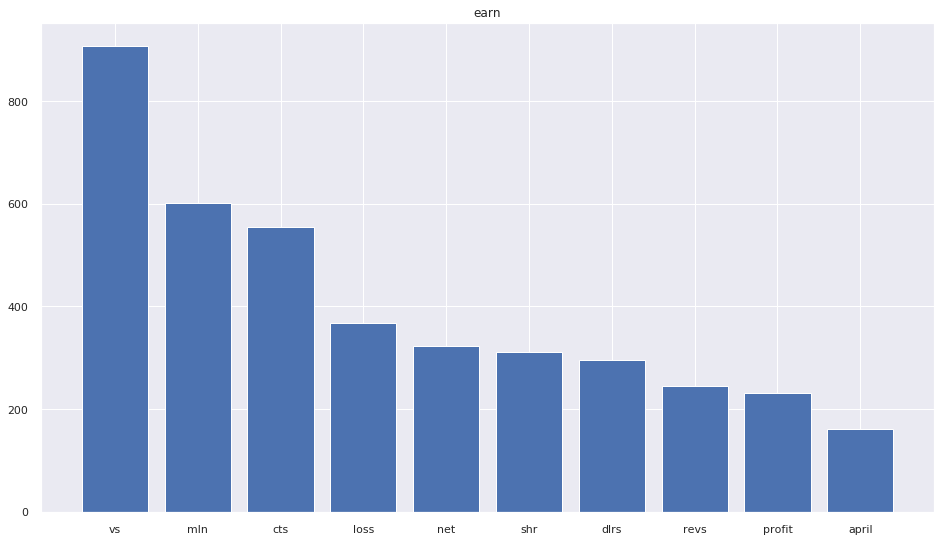

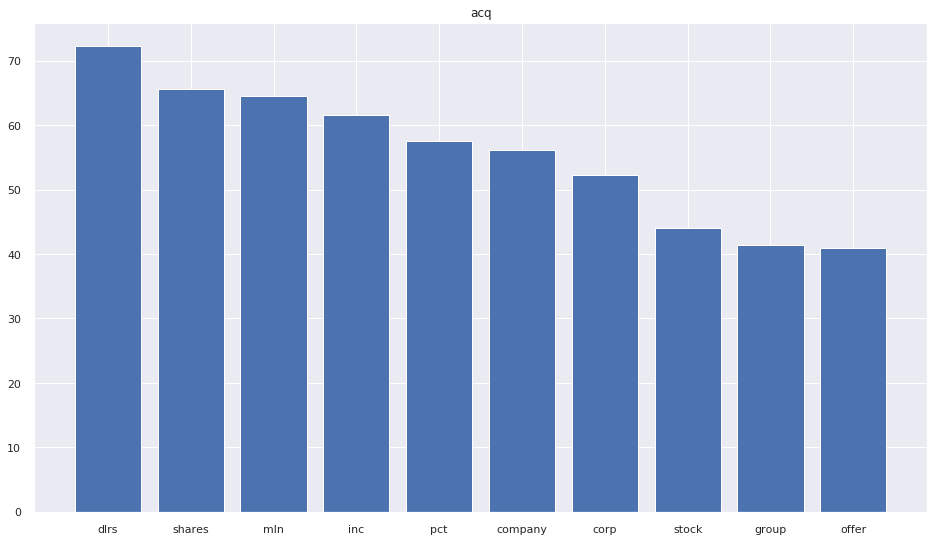

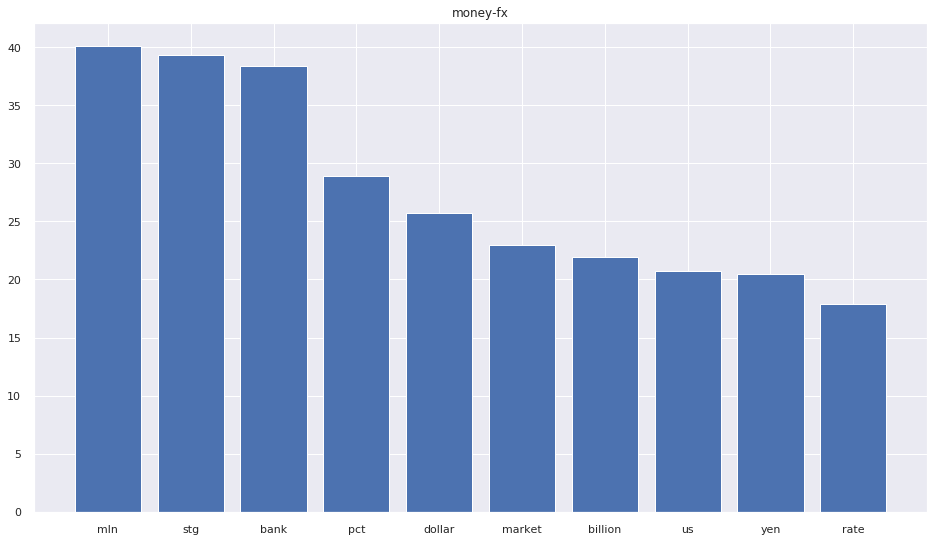

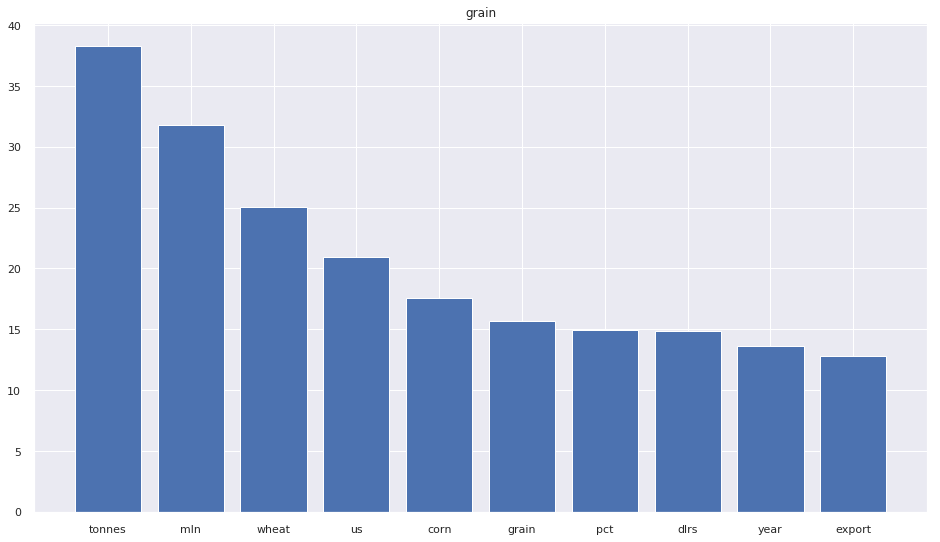

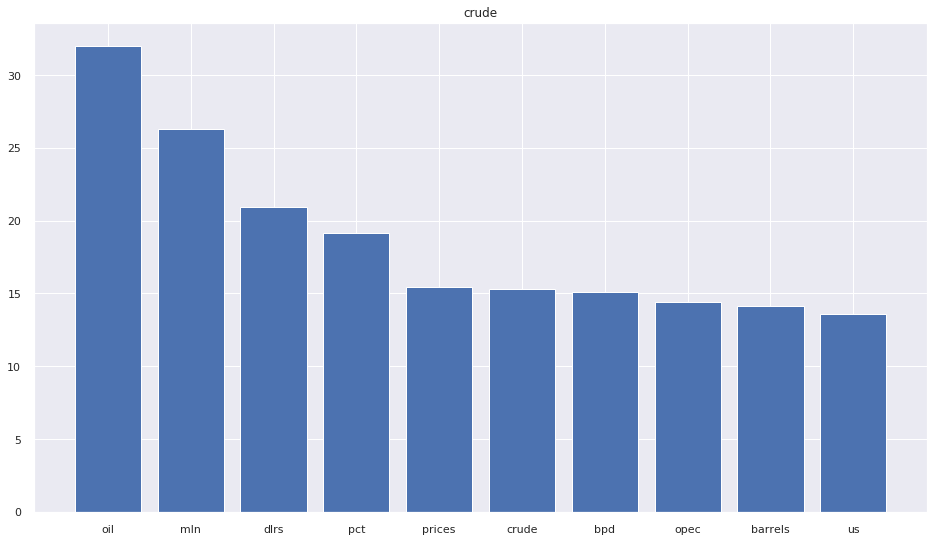

In [21]:
#filtered_dataframe[filtered_dataframe.topics_str.str.contains('cocoa')].index
topic_word_dictionary = {}
for count in range(5):
    plot_dictionary = {}
    topic_name = sorted_topics_counter[count][0]
    all_body_of_topic = filtered_dataframe[filtered_dataframe.topics_str.str.contains(topic_name)].body
    vectorizer = TfidfVectorizer()
    response = vectorizer.fit_transform(all_body_of_topic)
    feature_names = vectorizer.get_feature_names()
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(response.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top10 = sorted_scores[:10]
    topic_word_dictionary[topic_name] = plot_dictionary
    for i in range(10):
        plot_dictionary[top10[i][0]] = top10[i][1]
    x = plot_dictionary.keys()
    y = plot_dictionary.values()
    
    plt.figure(figsize=(16,9))
    plt.bar(x, y)
    plt.title(topic_name)

In [199]:
# vectorizer_for_word_frequency = CountVectorizer(max_df=0.85, stop_words='english')
# t0 = time()

# X = vectorizer_for_word_frequency.fit_transform(filtered_dataframe['body'].tolist()) #tolist eklendi dataframe sonuna
# list(vectorizer_for_word_frequency.vocabulary_.keys())[:10]
# print("done in %fs" % (time() - t0))
# print("n_samples: %d, n_features: %d" % X.shape)

done in 0.749217s
n_samples: 10377, n_features: 82345


In [63]:
vectorizer = TfidfVectorizer(max_df=0.80, min_df=0.02, stop_words='english')
t0 = time()

X = vectorizer.fit_transform(filtered_dataframe['body'].tolist())
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)

done in 0.904958s
n_samples: 10377, n_features: 394


In [202]:
# word_frequency = []
# word_index = vectorizer_for_word_frequency.vocabulary_
# t0 = time()

# for word,idx in word_index.items():
#     word_frequency.append((word,X[:,idx].sum()))

# print("done in %fs" % (time() - t0))

done in 140.984481s


In [203]:
# word_frequency = sorted(word_frequency,key=itemgetter(1), reverse=True)
# #for 5
# remove_amount = (len(word_frequency) * 2.5/100)
# remove_amount = round(remove_amount)
# modified_word_list = word_frequency[remove_amount:-remove_amount]
# vocabulary_cluster = [w for w, idx in modified_word_list]

# cluster_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, vocabulary=vocabulary_cluster)

# t0 = time()

# X = cluster_vectorizer.fit_transform(filtered_dataframe['body'].tolist())
# print("done in %fs" % (time() - t0))
# print("n_samples: %d, n_features: %d" % X.shape)

# #15
# #25
# #35

# #plot the zipf's law plotting and see how clusters are changed

done in 0.592542s
n_samples: 10377, n_features: 78227


In [223]:
Sum_of_squared_distances = []
Silhouette_scores = []

K = range(2,20)

for k in K:
    km = KMeans(n_clusters=k,init='k-means++')
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    y_means = km.predict(X)
    silhouette = silhouette_score(X, y_means, metric='euclidean')
    Silhouette_scores.append(silhouette)


# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()
print("done in %fs" % (time() - t0))

done in 1746.489082s


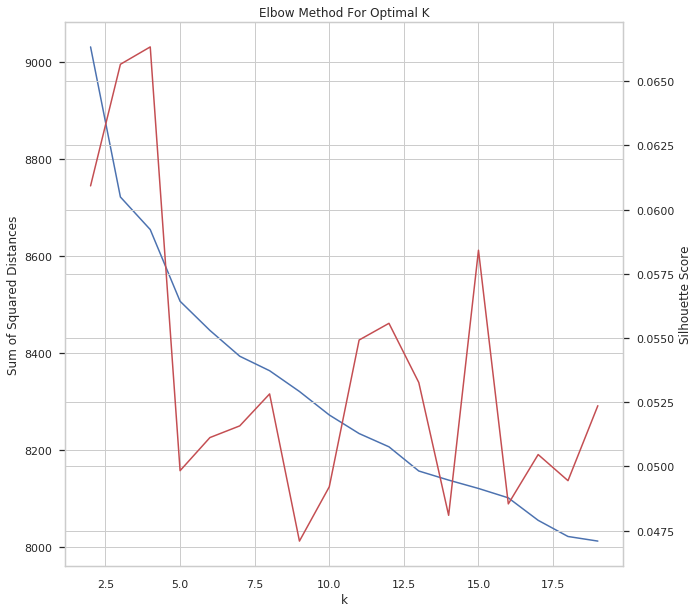

done in 1746.836667s


In [224]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.plot(K, Sum_of_squared_distances, 'bx-')
ax2.plot(K, Silhouette_scores, 'rx-')
ax2.set_ylabel("Silhouette Score")
ax.set_xlabel('k')
ax.set_ylabel('Sum of Squared Distances')
ax.set_title('Elbow Method For Optimal K')
plt.show()

print("done in %fs" % (time() - t0))

In [64]:
optimal_k = 8

In [65]:
km = KMeans(n_clusters=optimal_k, init='k-means++')
#print("Clustering sparse data with %s" % km)
t0 = time()
km = km.fit(X)
y_means = km.predict(X)
#silhouette = silhouette_score(X, y_means, metric='euclidean')
#print("Silhouette Score: %s" % silhouette)
print("done in %fs" % (time() - t0))

done in 37.886394s


In [167]:
#print("Performing LSA Dimension Reduction")
#t0 = time()
#svd = TruncatedSVD(n_components=5)
#normalizer = Normalizer(copy=False)
#lsa = make_pipeline(svd, normalizer)

#X = lsa.fit_transform(X)

#print("done in %fs" % (time() - t0))

#print()
#print("AFTER LSA matrix reduction: ")
#print("n_samples: %d, n_features: %d" % X.shape)

In [168]:
# plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='viridis')
# centers = km.cluster_centers_
# plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.5);
# #plt.xlim([0.0,0.01])
# #plt.ylim([0.0,0.005])
# plt.show()

In [170]:
#feat_names = vectorizer.get_feature_names()

#for compNum in range(20,30):
#    comp = svd.components_[compNum]

#    indeces = np.argsort(comp).tolist()
#    indeces.reverse()
#    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]
#    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]

#    terms.reverse()
#    weights.reverse()
#    positions = arange(10) + .5    # the bar centers on the y axis

#    figure(compNum)
#    barh(positions, weights, align='center')
#    yticks(positions, terms)
#    xlabel('Weight')
#    title('Strongest terms for component %d' % (compNum))
#    grid(True)
#    show()

In [171]:
# filtered_dataframe['cluster_number'] = km.predict(X)
# filtered_dataframe

In [172]:
# filtered_dataframe['cluster_number'].value_counts()
# cluster_document_number = {}
# for i in range(optimal_k):
#     cluster_document_number['cluster ' + str(i+1)] = filtered_dataframe['cluster_number'].value_counts()[i]

# cluster_document_number

# plt.figure(figsize=(16,9))
# plt.title("Documents Number of Clusters")
# plt.bar(cluster_document_number.keys(), cluster_document_number.values())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

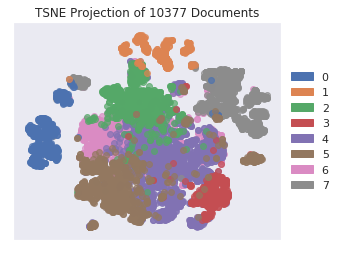

In [66]:
tsne = TSNEVisualizer()
tsne.fit(X, y_means)
tsne.poof()

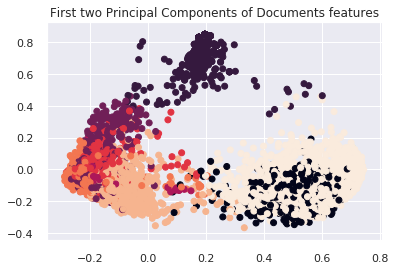

In [68]:
from sklearn.decomposition import PCA

Xpca = PCA(n_components=2).fit_transform(X.toarray())

plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y_means)
plt.title('First two Principal Components of Documents features')
plt.show()

In [69]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
stop_words.append('said')
stop_words.append('reuters')
stop_words.append('reuter')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
# compile sample documents into a list
doc_set = filtered_dataframe.body.values.tolist()

bigram = gensim.models.Phrases(doc_set, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc_set], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(doc_set)  # processed Text Data!

In [71]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [72]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,8), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.410543,"pct, year, would, market, price, new, rise, la...","[shower, continue, week, inthe, bahia, cocoa, ..."
1,1,0.0,0.594704,"rate, bank, reserve, loan, announce, german, e...","[agriculture, farmerowne, reserve, national, f..."
2,2,6.0,0.406334,"oil, platform, saudi, crude, barrel, bpd, opec...","[argentine, grain, board, figure, showcrop, re..."
3,3,7.0,0.675407,"group, revs, month, share, corp, cts, offer, i...","[champion, product, inc, itsboard, director, a..."
4,4,1.0,0.754836,"company, share, inc, mln, dlr, stock, common, ...","[computer, terminal, system, inc, saidit, comp..."
5,5,3.0,0.728321,"mln, ct, net, shr, dlr, loss, mth, profit, shr...","[shr, ct, dlr, net, asset, mln, mln, deposit, ..."
6,6,4.0,0.567207,"pct, year, would, market, price, new, rise, la...","[ohio, mattress, co, firstquarter, end, februa..."
7,7,3.0,0.941141,"mln, ct, net, shr, dlr, loss, mth, profit, shr...","[oper, shr, loss, ct, profit, ct, oper, shr, p..."
8,8,3.0,0.889709,"mln, ct, net, shr, dlr, loss, mth, profit, shr...","[shr, dlr, net, mln, rev, mln, mln, mth, shr, ..."
9,9,4.0,0.683029,"pct, year, would, market, price, new, rise, la...","[dean, food, co, expect, earning, thefourth, q..."


In [73]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.766041,"rate, bank, reserve, loan, announce, german, economist, central, national, call","[turkish, central, bank, set, aliradollar, rate, march, dollardown, previous, bank, also, set, l..."
1,1.0,0.902749,"company, share, inc, mln, dlr, stock, common, acquire, sale, buy","[theracare, inc, agreedto, acquire, cushe, associate, glendale, calif, inexchange, theracare, sh..."
2,2.0,0.405371,"iranian, gulf, military, decide, bond, port, kuwaiti, franc, tehran, prime","[iranian, premier, mirhossein, country, would, retaliate, navy, attack, ongulf, oil, platform, a..."
3,3.0,0.977573,"mln, ct, net, shr, dlr, loss, mth, profit, shrs, note","[shr, loss, ct, loss, net, loss, mln, loss, mln, rev, mln, mln, year, shr, loss, ct, profit, net..."
4,4.0,0.922547,"pct, year, would, market, price, new, rise, last, government, official","[growth, swisseconomy, likely, slow, pct, year, pct, reach, pct, last, year, accord, study, bya,..."
5,5.0,0.780732,"export, trade, tonne, iran, attack, accord, soviet, source, state, import","[european, commission, authorise, theexport, tonne, irish, intervention, barley, todaystender, n..."
6,6.0,0.546834,"oil, platform, saudi, crude, barrel, bpd, opec, grain, arabia, lpg","[henley, group, inc, kellogg, cosubsidiary, consortium, inelectra, receive, acontract, corpoven,..."
7,7.0,0.941763,"group, revs, month, share, corp, cts, offer, increase, stock, pct","[trilon, financial, corp, stock, dividend, class, share, class, ashare, hold, payable, may, shar..."


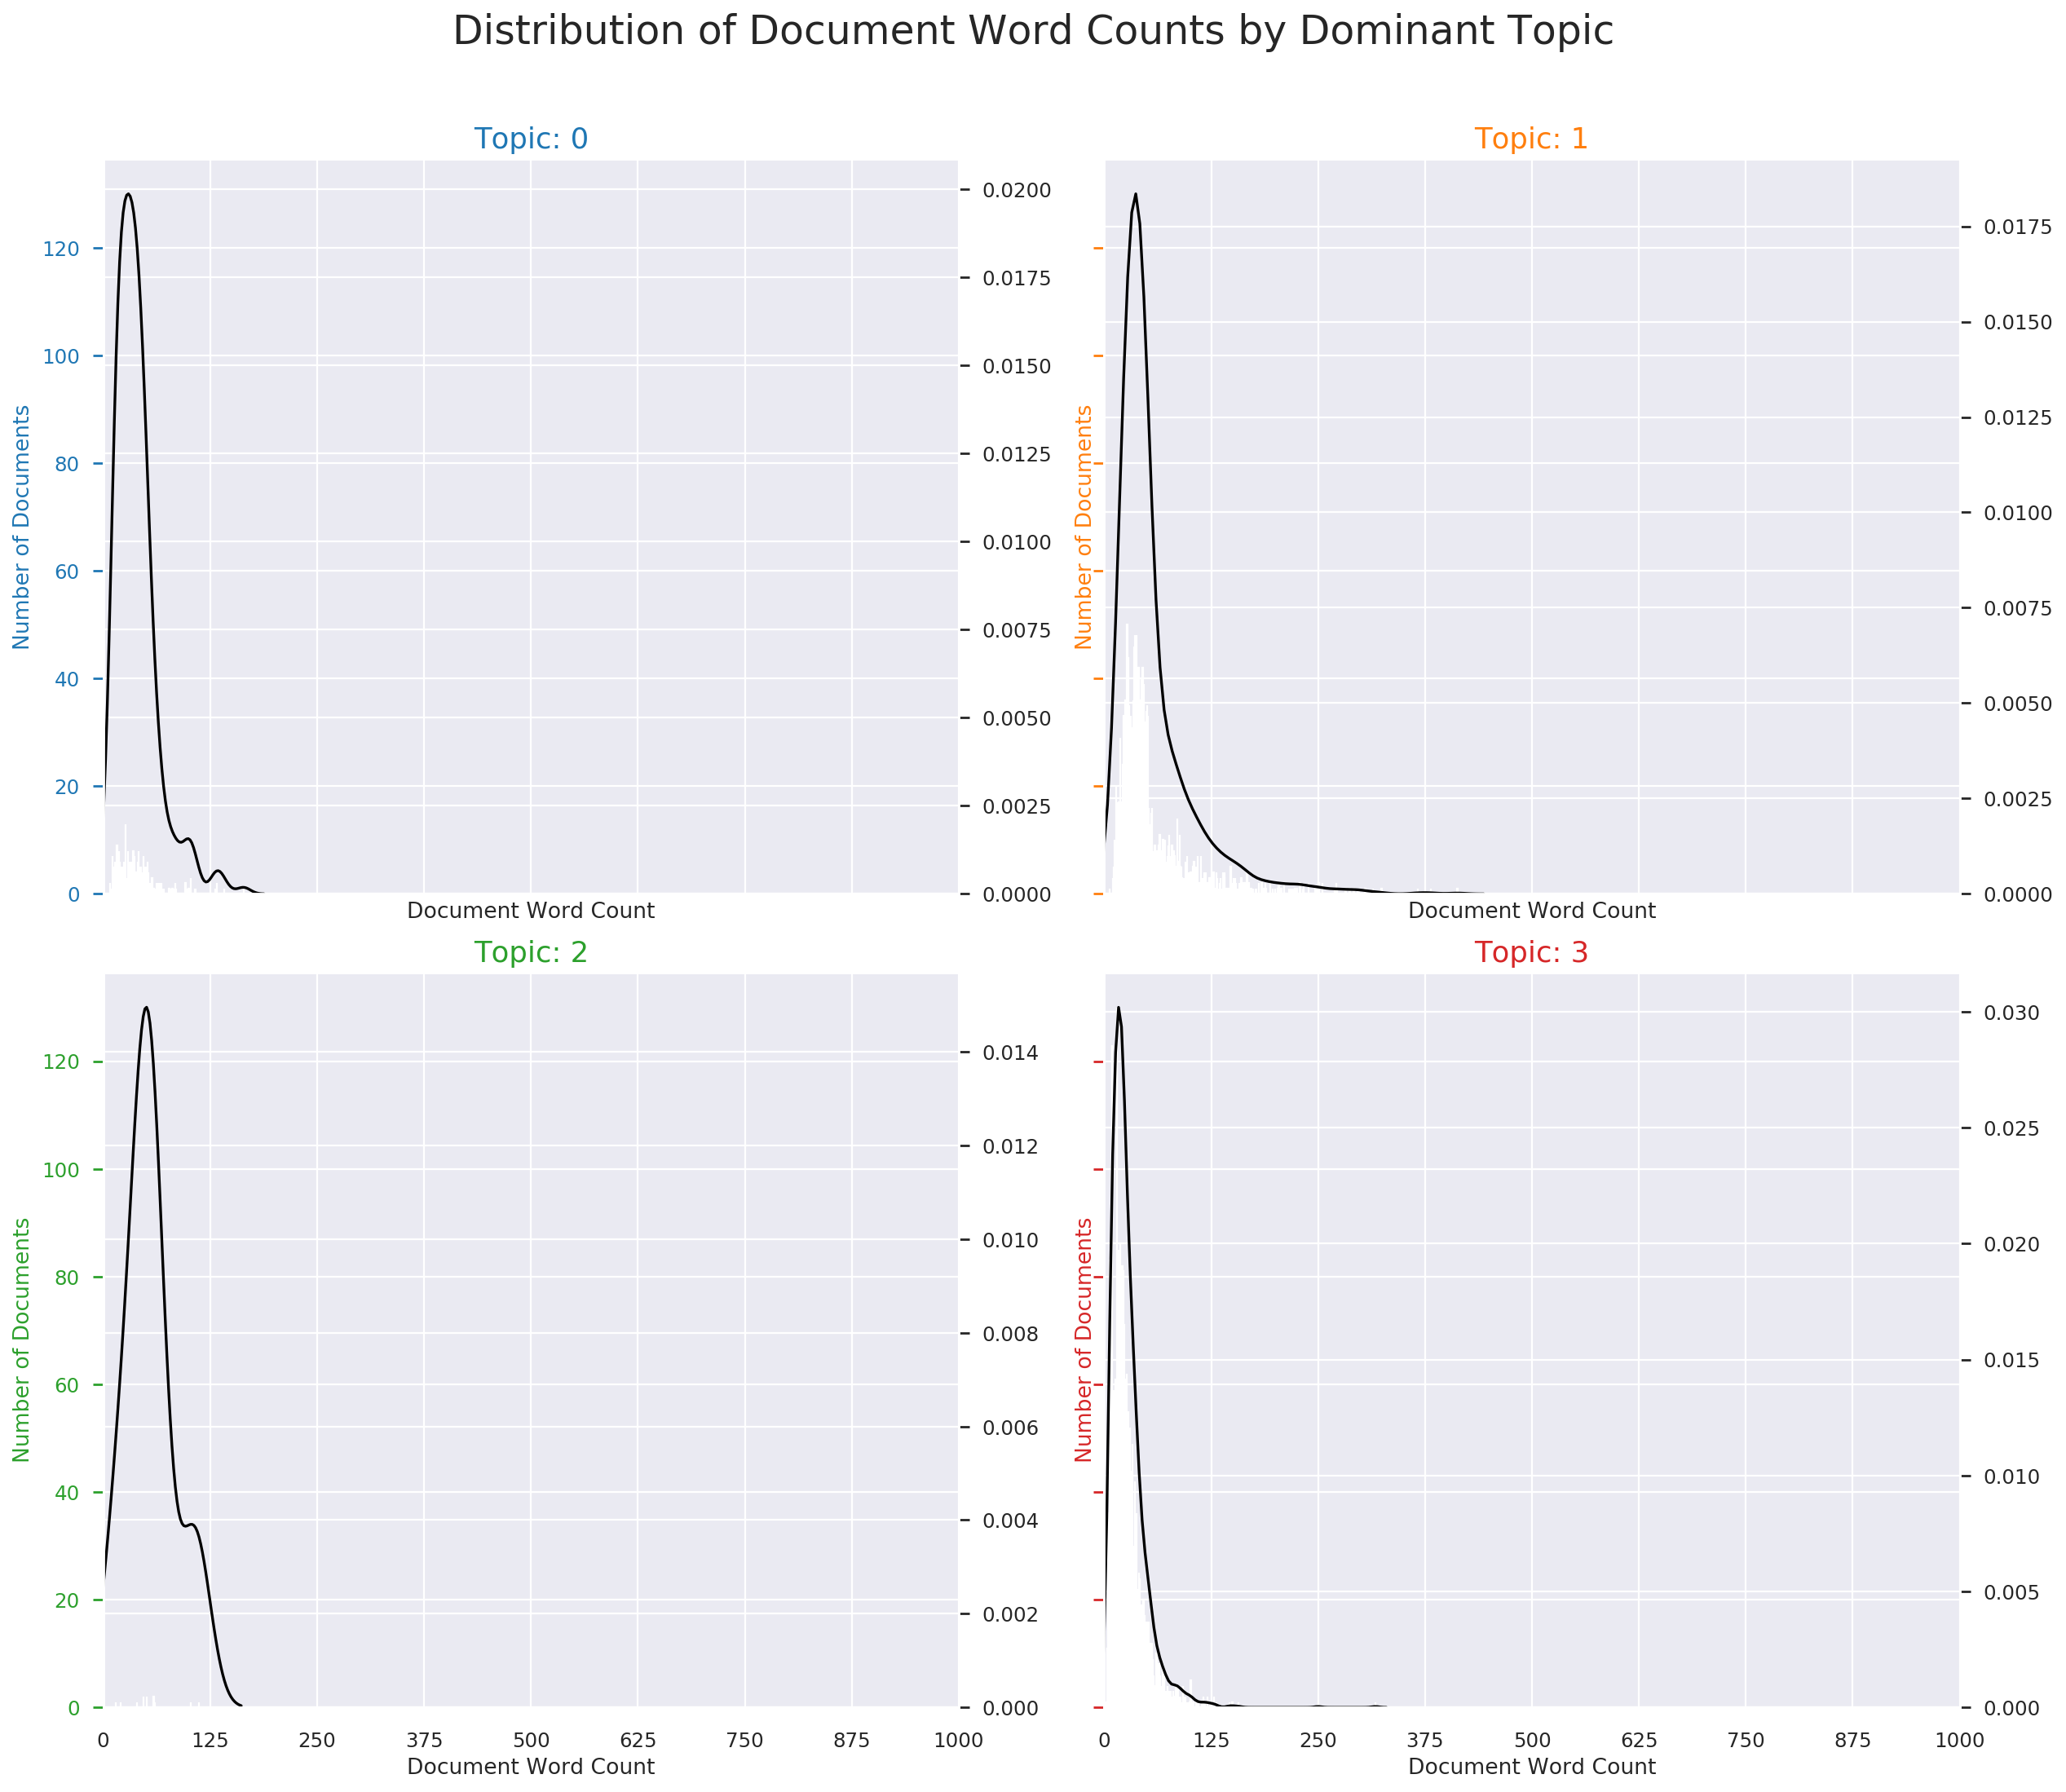

In [74]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

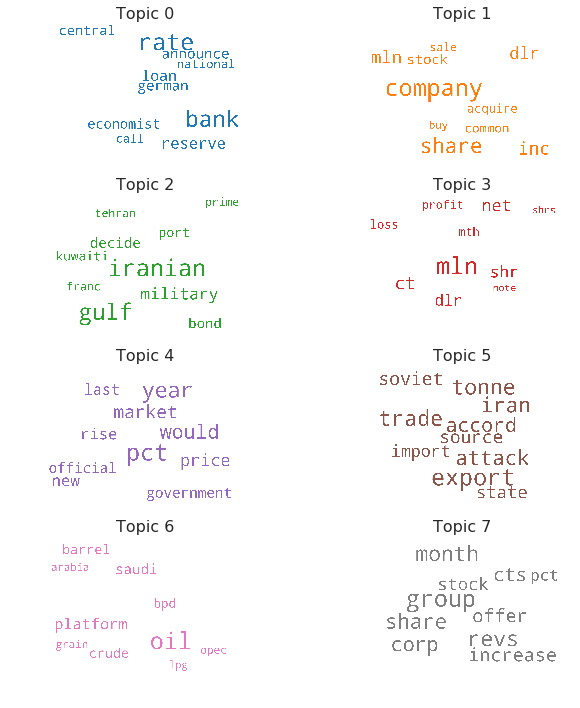

In [78]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

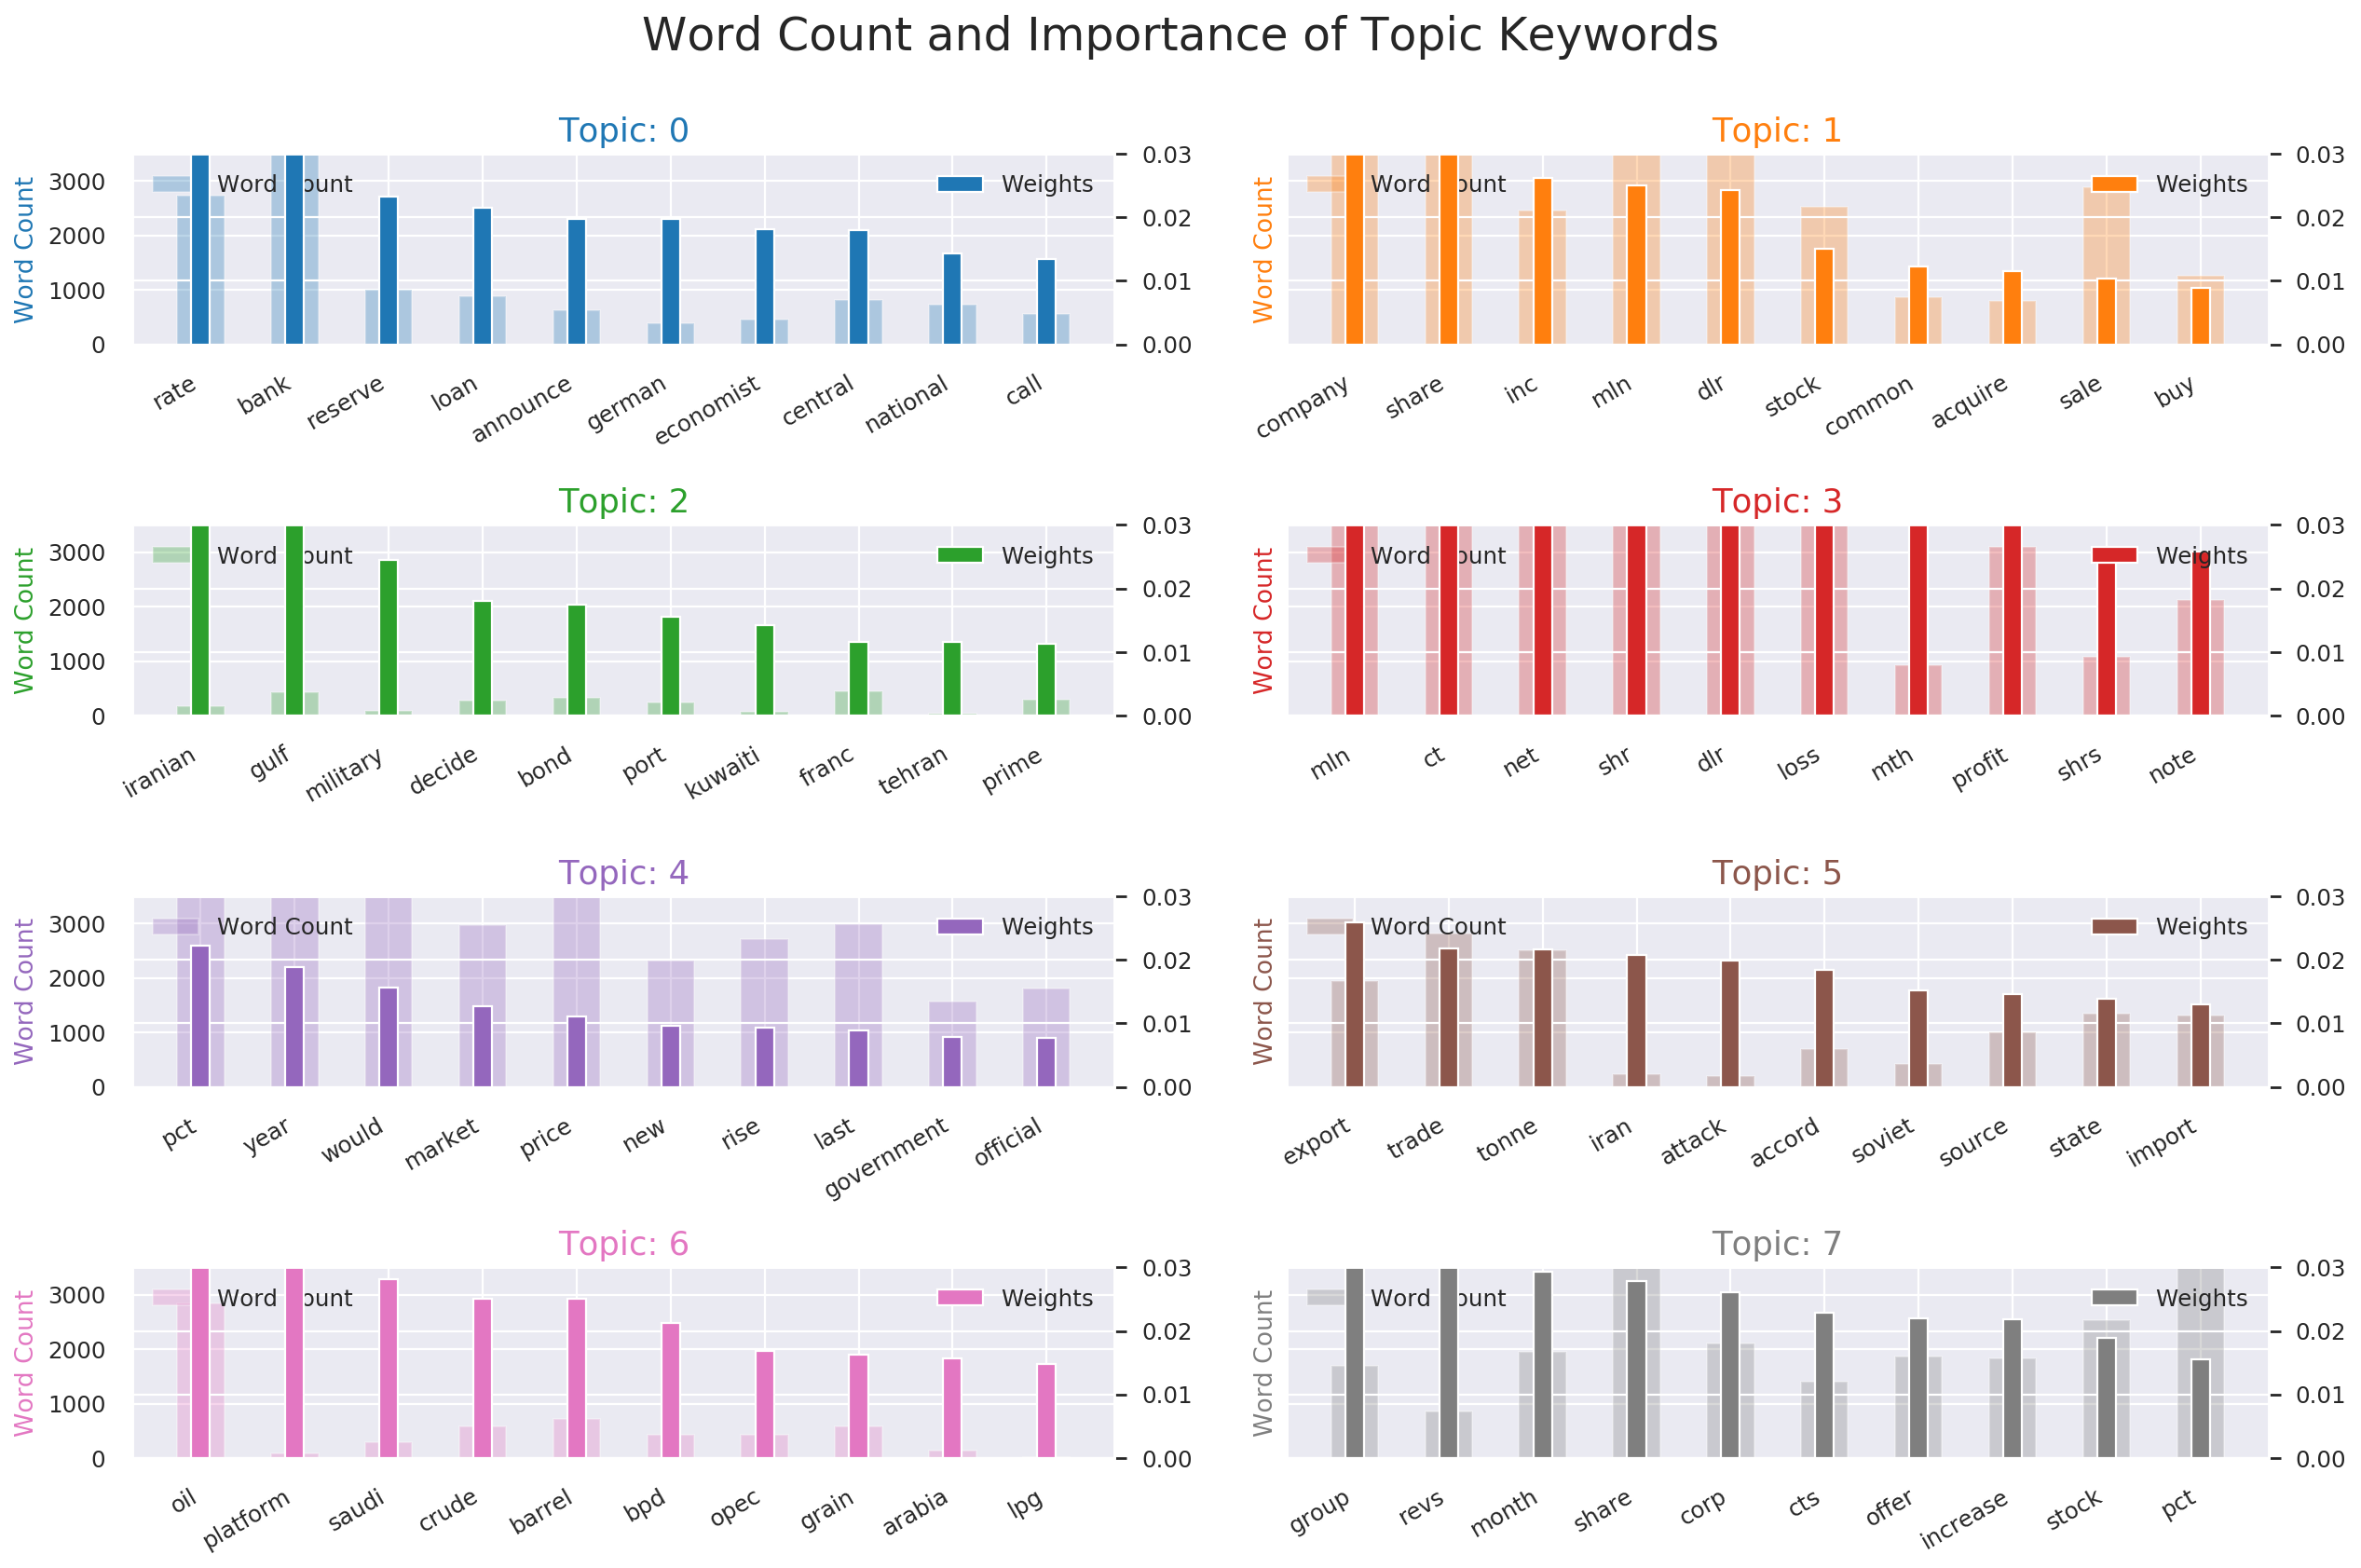

In [80]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [79]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 8
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9476 samples in 0.004s...
[t-SNE] Computed neighbors for 9476 samples in 0.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9476
[t-SNE] Computed conditional probabilities for sample 2000 / 9476
[t-SNE] Computed conditional probabilities for sample 3000 / 9476
[t-SNE] Computed conditional probabilities for sample 4000 / 9476
[t-SNE] Computed conditional probabilities for sample 5000 / 9476
[t-SNE] Computed conditional probabilities for sample 6000 / 9476
[t-SNE] Computed conditional probabilities for sample 7000 / 9476
[t-SNE] Computed conditional probabilities for sample 8000 / 9476
[t-SNE] Computed conditional probabilities for sample 9000 / 9476
[t-SNE] Computed conditional probabilities for sample 9476 / 9476
[t-SNE] Mean sigma: 0.000003
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.208527
[t-SNE] KL divergence after 1000 iterations: 1.195119


Loading BokehJS ...